In [1]:
%matplotlib inline

import os
import cv2
import imp
import glob
import sympy as sp
import scipy.misc
import numpy as np
import pandas as pd
from numpy import pi
from sympy.abc import x
from decimal import Decimal
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.gridspec as gridspec

import generative_models 

report_dir = '../report'

In [2]:
df = pd.DataFrame(columns={'label', 'img'})
positives = [{'label':1, 'img':cv2.imread(path)} for path in glob.glob('data/positives/*.png')]
negatives = [{'label':0, 'img':cv2.imread(path)} for path in glob.glob('data/negatives/*.png')]
df = df.append(positives, ignore_index=True)
df = df.append(negatives, ignore_index=True)

In [3]:
df['edges'] = df.img.apply(lambda img: cv2.Canny(img,100,200))
df['mean_edges'] = df.edges.apply(lambda img: np.mean(img))
for i, c in enumerate(['b', 'r', 'g']):
    df['mean_%s' % c] = df.img.apply(lambda img: np.mean(img[:, :, i]))
    df['max_%s' % c] = df.img.apply(lambda img: np.max(img[:, :, i]))
    df['min_%s' % c] = df.img.apply(lambda img: np.min(img[:, :, i]))
    df['delta_%s' % c] = np.abs(df['min_%s' % c] - df['max_%s' % c]) 
    df['mean_%s' % c] = df.img.apply(lambda img: np.mean(img[:, :, i]))
    df['std_%s' % c] = df.img.apply(lambda img: np.std(img[:, :, i]))


In [4]:
features = ['label', 'mean_edges', 'delta_r', 'std_r', 'std_g', 'std_b']
df[features].sample(15)

,label,mean_edges,delta_r,std_r,std_g,std_b
20,1.0,52.682292,152,31.570393,24.072642,9.855906
28,1.0,46.484375,144,25.644335,21.434567,7.886125
45,0.0,0.000000,74,17.005151,13.496268,14.869367
4,1.0,32.760417,128,22.745217,17.714692,10.934814
24,1.0,50.026042,133,28.903050,25.212576,9.068359
31,0.0,0.000000,59,10.793656,10.515980,9.388509
29,1.0,49.140625,138,28.115563,22.041460,8.998087
58,0.0,0.000000,68,17.356813,14.811284,13.265838
35,0.0,10.182292,97,24.910236,18.171666,7.913879
42,0.0,0.000000,27,5.578191,5.788481,6.998589


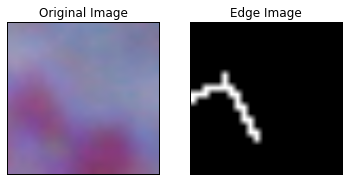

label               0
mean_edges    10.1823
delta_r            97
std_r         24.9102
std_g         18.1717
std_b         7.91388
Name: 35, dtype: object


In [5]:
funf = df[(df.mean_edges > 0) & (df.mean_edges < 20)].iloc[0]

plt.subplot(121),plt.imshow(funf.img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(funf.edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

print funf[features]

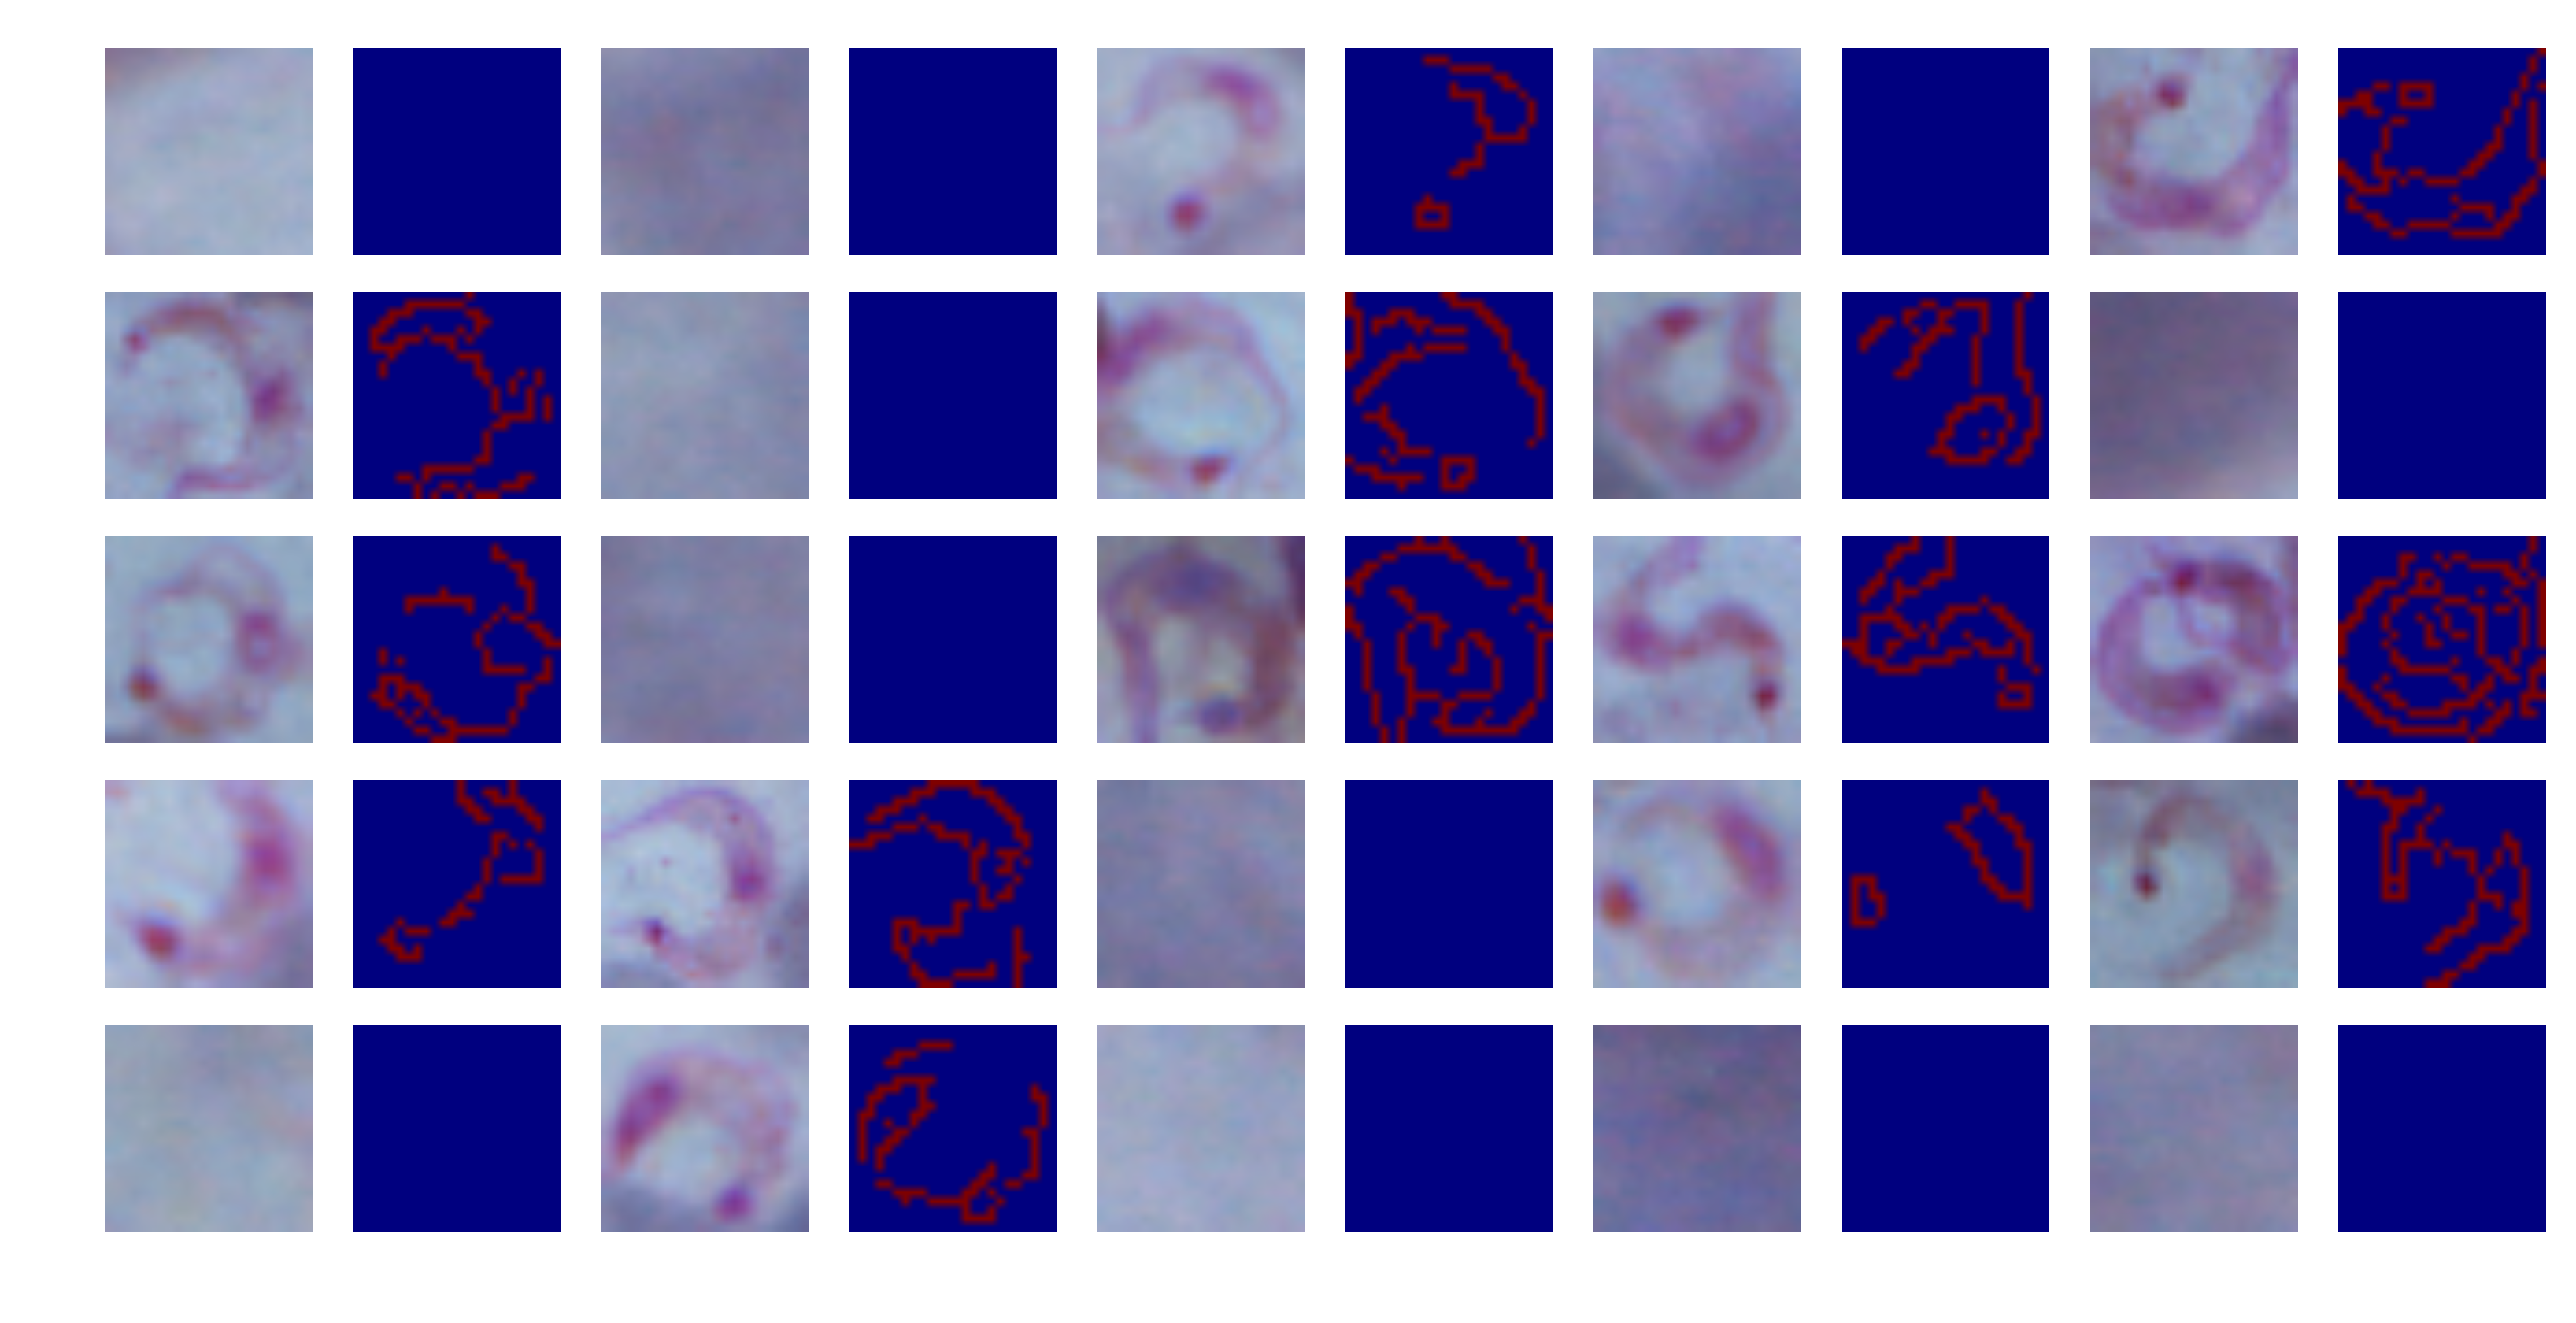

In [6]:
rows = 5
cols = 5
fig, ax = plt.subplots(num=None, figsize=(2*rows, cols), dpi=400, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(rows, 2*cols)
ax = [plt.subplot(gs[i]) for i in range(2*rows*cols)]
gs.update(hspace=0)
for i, (_, row) in enumerate(df.sample(rows*cols).iterrows()):
    ax[2*i].imshow(row.img)
    ax[2*i+1].imshow(row.edges)
    ax[2*i+1].axis('off')
    ax[2*i].axis('off')
plt.show()

In [17]:
imp.reload(generative_models)
generatibe_model = generative_models.GaussianDiscriminant(df[features])

for i in range(60):
    probs = generatibe_model.pdfs(df.iloc[i])
    df.set_value(i, 'p_0', probs[0])
    df.set_value(i, 'p_1', probs[1])
    df.set_value(i, 'prediction', probs.index(max(probs)))

print 'correct classifications:', (df.prediction == df.label).sum()
print 'pdf sum = 1: ', ((df.p_0 + df.p_1) == 1).sum()

correct classifications: 60
pdf sum = 1:  0
